# 🧠 Global Mental Health Burden (GBD 1990–2019)
**Python: Data Cleaning + Exploratory Analysis (EDA) → Tableau: Dashboard**

## What this notebook does
This notebook focuses on:
1) Loading and cleaning three raw GBD CSV files  
2) Producing a few exploratory plots (the same ones created in Python originally)  
3) Exporting **three cleaned CSV files** that are used in the Tableau dashboard (no dashboard changes required)

## Tableau note
All final dashboard visuals were created directly in Tableau.  
This notebook is only for data preparation + a small set of diagnostic/EDA plots.

## Output files (used by Tableau)
- `cleaned_mental-illnesses.csv`
- `cleaned_burden-disease.csv`
- `cleaned_burden-number-of-countries.csv`

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_style("whitegrid")

## 1) File paths (edit only here)

✅ Recommended GitHub structure:
- Put raw files in: `data/raw/`
- Cleaned outputs in: `data/processed/`

If you keep the same filenames, you won’t need to change anything else.

In [31]:
df = pd.read_csv("/Users/zohrehsamieekadkani/Desktop/Dashboard image/archive/1- mental-illnesses-prevalence.csv")

df.info()
display(df.head())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64

## 3) Clean prevalence dataset
Steps (same as your original code):
- Drop `Code`
- Rename `Entity` → `country`
- Standardize column names
- Rename long metric columns to readable names

In [10]:
# Drop Code
df1 = df.drop(columns=["Code"])

# Rename Entity -> country
df_clean = df1.rename(columns={"Entity": "country"})

# Standardize column names
df_clean.columns = (
    df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace(r"[()]+", "", regex=True)
)

# Rename long mental illness columns (exactly as you had)
df_clean = df_clean.rename(columns={
    "schizophrenia_disorders_share_of_population___sex:_both___age:_age_standardized": "schizophrenia_prevalence",
    "depressive_disorders_share_of_population___sex:_both___age:_age_standardized": "depression_prevalence",
    "anxiety_disorders_share_of_population___sex:_both___age:_age_standardized": "anxiety_prevalence",
    "bipolar_disorders_share_of_population___sex:_both___age:_age_standardized": "bipolar_prevalence",
    "eating_disorders_share_of_population___sex:_both___age:_age_standardized": "eating_disorders_prevalence"
})

df_clean.info()
display(df_clean.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      6420 non-null   object 
 1   year                         6420 non-null   int64  
 2   schizophrenia_prevalence     6420 non-null   float64
 3   depression_prevalence        6420 non-null   float64
 4   anxiety_prevalence           6420 non-null   float64
 5   bipolar_prevalence           6420 non-null   float64
 6   eating_disorders_prevalence  6420 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 351.2+ KB


,country,year,schizophrenia_prevalence,depression_prevalence,anxiety_prevalence,bipolar_prevalence,eating_disorders_prevalence
0,Afghanistan,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,1994,0.220183,4.977782,4.670810,0.699898,0.111815


## 4) Global trend over time (EDA)

Compute the global mean prevalence by year and visualize the trend for each disorder.

In [11]:
trend_over_time = df_clean.groupby("year")[[
    "schizophrenia_prevalence",
    "depression_prevalence",
    "anxiety_prevalence",
    "bipolar_prevalence",
    "eating_disorders_prevalence"
]].mean()

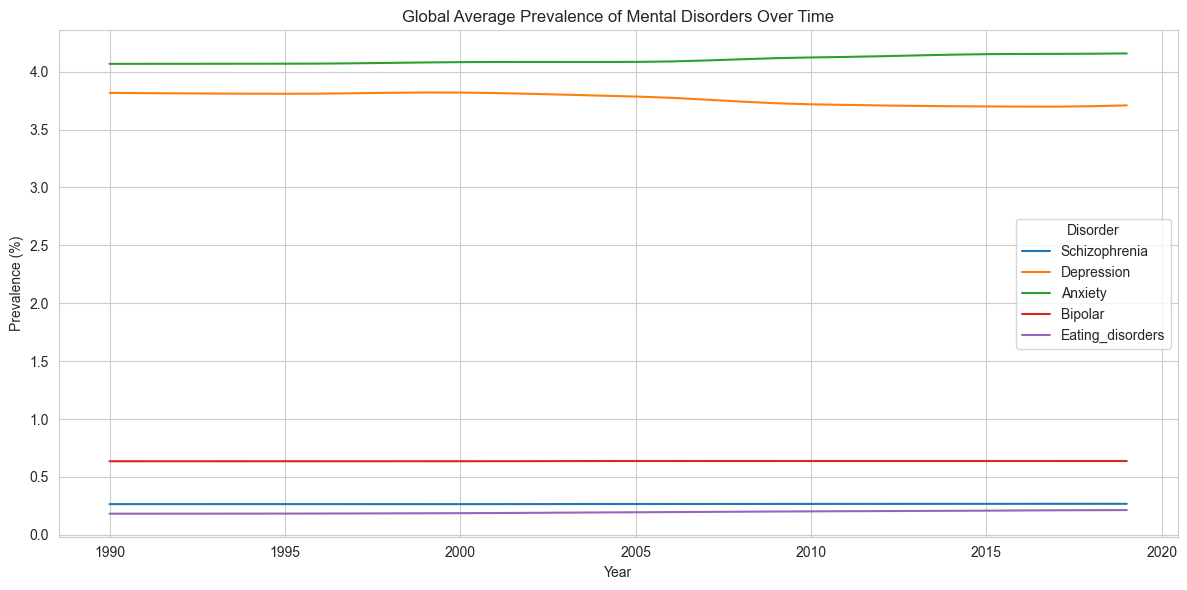

In [11]:
plt.figure(figsize=(12, 6))
for column in trend_over_time.columns:
    plt.plot(trend_over_time.index, trend_over_time[column],
             label=column.replace("_prevalence", "").capitalize())

plt.title("Global Average Prevalence of Mental Disorders Over Time")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")  # ✅ corrected label (this dataset is prevalence)
plt.legend(title="Disorder")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

## 5) Top 10 countries by average depression prevalence (EDA)
Ranks countries based on the average depression prevalence across all years.

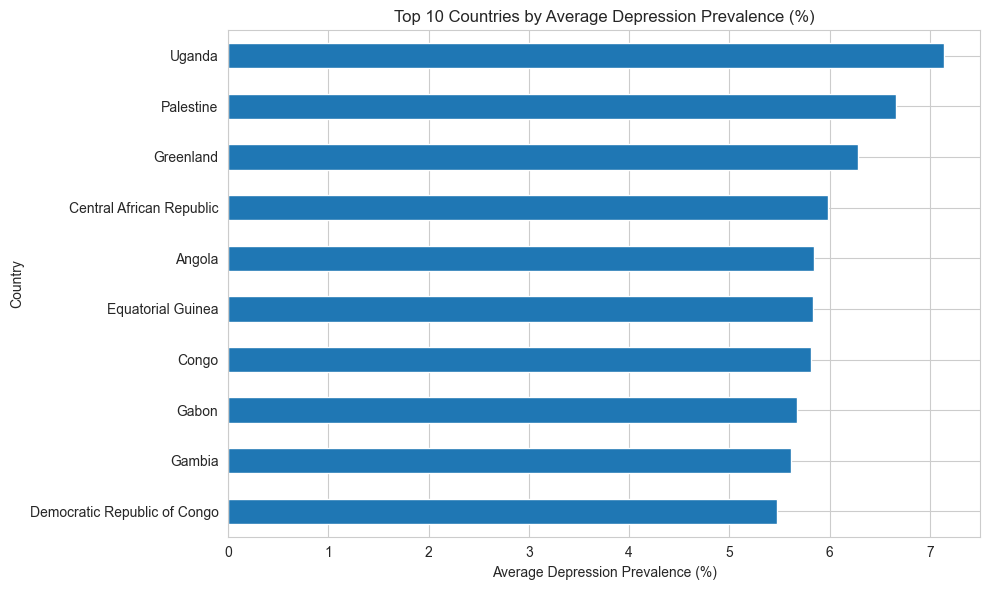

In [12]:
top_countries_depression = df_clean.groupby("country")["depression_prevalence"].mean().nlargest(10)

top_countries_depression.plot(
    kind="barh",
    title="Top 10 Countries by Average Depression Prevalence (%)",
    figsize=(10, 6)
)
plt.xlabel("Average Depression Prevalence (%)")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

## 6) Correlation between disorders (EDA)

Computes the correlation matrix between prevalence metrics and visualizes it as a heatmap.

In [13]:
prevalence_data = df_clean[[
    "schizophrenia_prevalence",
    "depression_prevalence",
    "anxiety_prevalence",
    "bipolar_prevalence",
    "eating_disorders_prevalence"
]]

correlation_matrix = prevalence_data.corr()

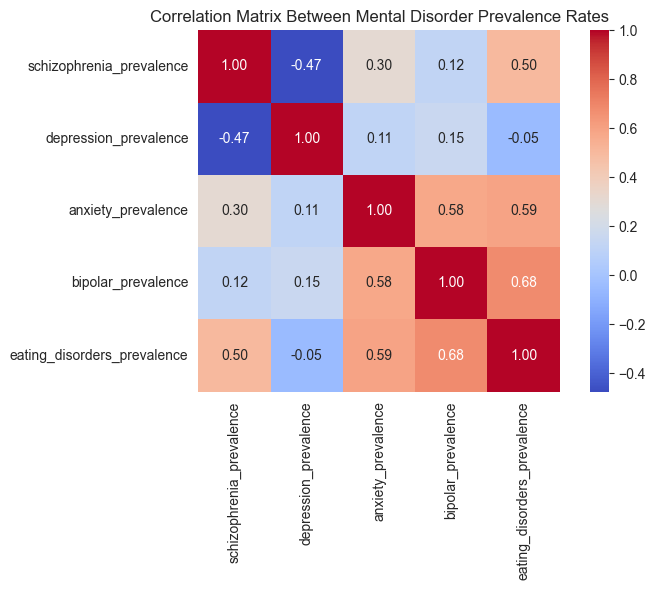

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix Between Mental Disorder Prevalence Rates")
plt.tight_layout()
plt.show()
plt.close()

## 7) Country clustering (KMeans) — exploratory

This is exploratory clustering to identify distinct country profiles based on prevalence metrics.
(Clustering was performed in Python; dashboard visuals were built in Tableau.)

In [15]:
df_cluster = df_clean[[
    "country",
    "schizophrenia_prevalence",
    "depression_prevalence",
    "anxiety_prevalence",
    "bipolar_prevalence",
    "eating_disorders_prevalence"
]].copy()

df_cluster = df_cluster.dropna().drop_duplicates(subset=["country"])

features = [
    "schizophrenia_prevalence",
    "depression_prevalence",
    "anxiety_prevalence",
    "bipolar_prevalence",
    "eating_disorders_prevalence"
]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(scaled_data)

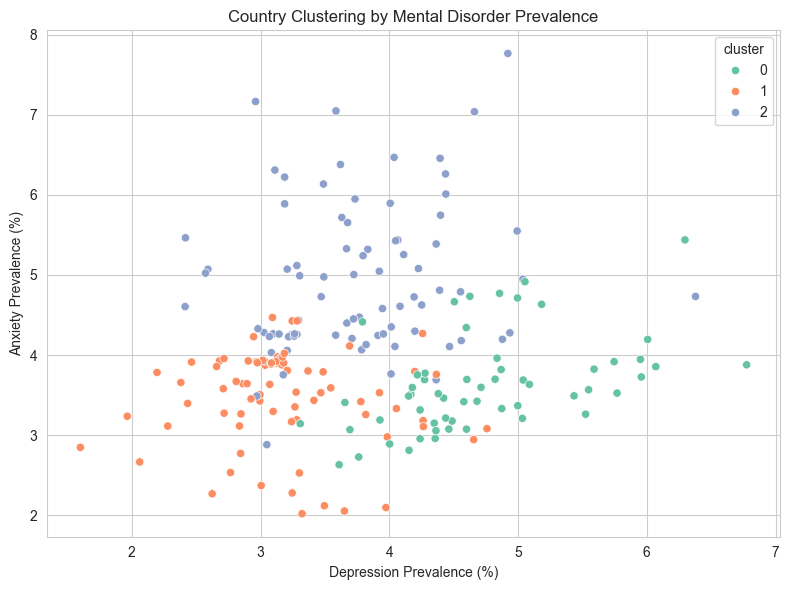

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cluster,
    x="depression_prevalence",
    y="anxiety_prevalence",
    hue="cluster",
    palette="Set2"
)
plt.title("Country Clustering by Mental Disorder Prevalence")
plt.xlabel("Depression Prevalence (%)")
plt.ylabel("Anxiety Prevalence (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

## 8) Distribution plots (EDA)

Visualize the distribution of prevalence values for each disorder (histogram + KDE).

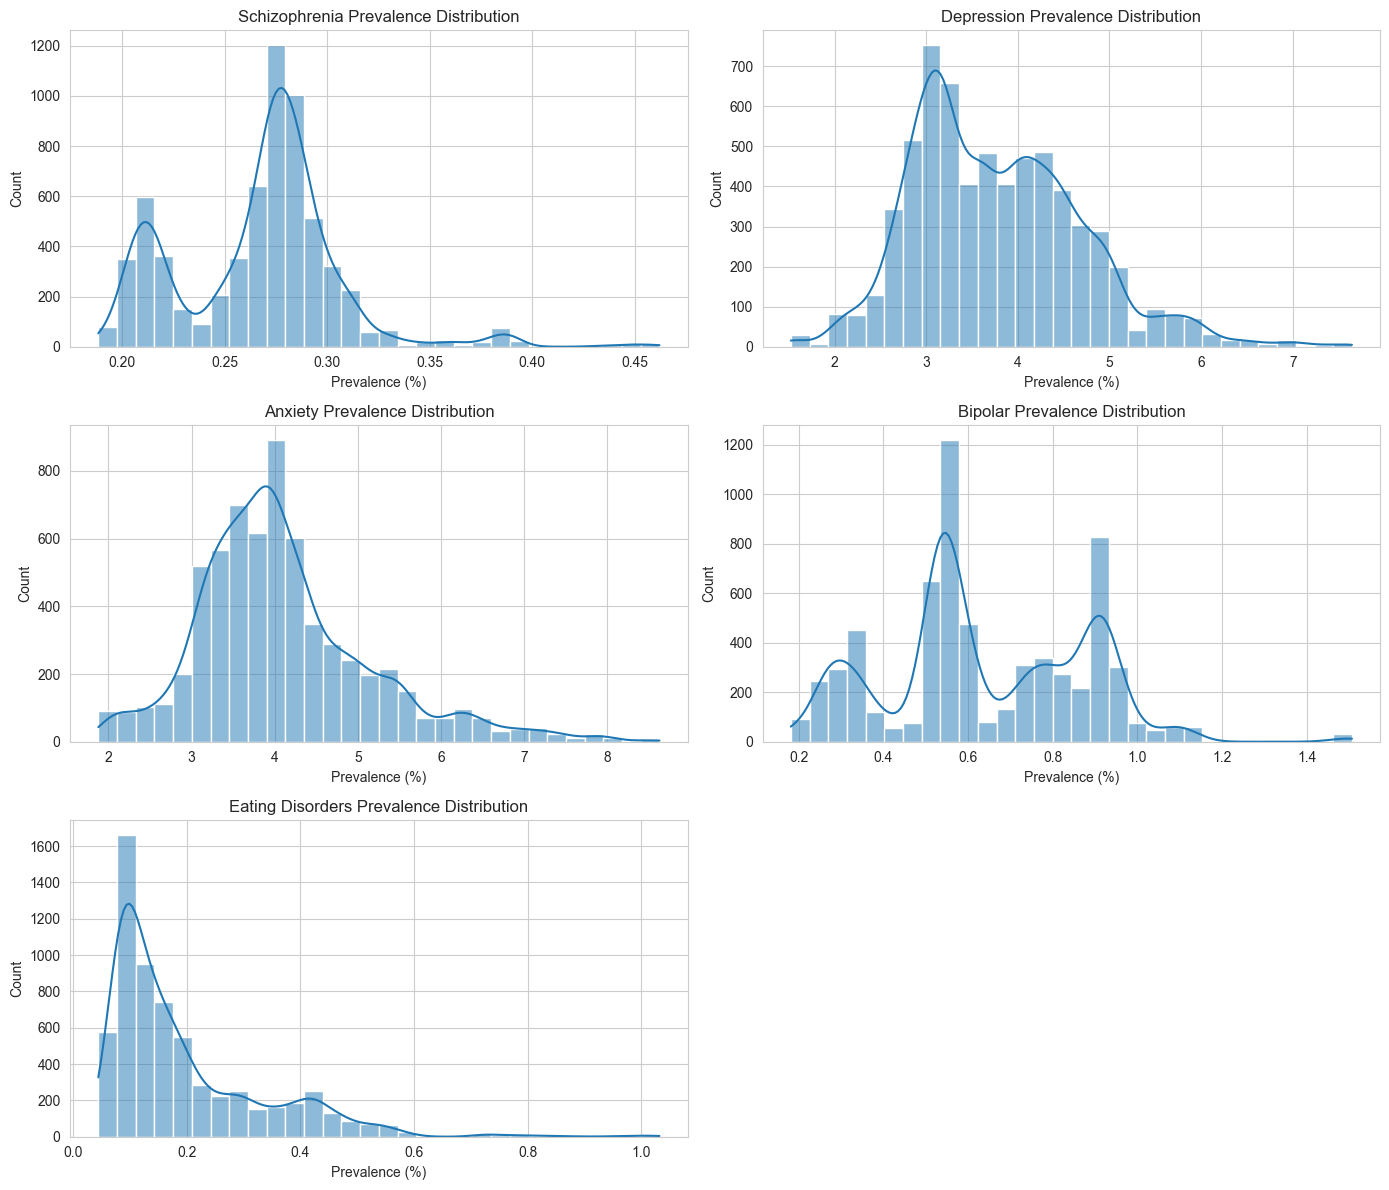

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, disorder in enumerate(features):
    sns.histplot(df_clean[disorder].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"{disorder.replace('_', ' ').title()} Distribution")
    axes[i].set_xlabel("Prevalence (%)")
    axes[i].grid(True)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()
plt.close()

## 9) Cluster summaries (quick checks)

These tables summarize cluster behavior and list countries in selected clusters.

In [18]:
df_cluster.groupby("cluster")["anxiety_prevalence"].mean()

cluster
0    3.638302
1    3.464668
2    4.934860
Name: anxiety_prevalence, dtype: float64

In [19]:
blue_cluster_countries = df_cluster[df_cluster["cluster"] == 2][
    ["country", "anxiety_prevalence", "depression_prevalence"]
]
display(blue_cluster_countries.sort_values(by="anxiety_prevalence", ascending=False).head(10))

,country,anxiety_prevalence,depression_prevalence
4620,Portugal,7.763925,4.921020
4290,Norway,7.164135,2.961463
4050,New Zealand,7.046516,3.586067
2700,Iran,7.036182,4.661584
2760,Ireland,6.467678,4.037525
5520,Switzerland,6.455809,4.394794
4020,Netherlands,6.378220,3.620623
1470,Cyprus,6.309203,3.111478
2070,France,6.260385,4.436945
3540,Malta,6.221291,3.187725


In [20]:
green_cluster_countries = df_cluster[df_cluster["cluster"] == 0][[
    "country",
    "anxiety_prevalence",
    "depression_prevalence",
    "bipolar_prevalence",
    "eating_disorders_prevalence",
    "schizophrenia_prevalence"
]]

green_cluster_countries_sorted = green_cluster_countries.sort_values(by="country")

print("All countries in the Green Cluster (Cluster 0):")
print(green_cluster_countries_sorted.to_string(index=False))

All countries in the Green Cluster (Cluster 0):
                     country  anxiety_prevalence  depression_prevalence  bipolar_prevalence  eating_disorders_prevalence  schizophrenia_prevalence
                 Afghanistan            4.713314               4.996118            0.703023                     0.127700                  0.223206
           Africa (IHME GBD)            3.696839               4.602806            0.607027                     0.111027                  0.219527
                      Angola            3.947545               5.950870            0.553656                     0.108704                  0.213980
                       Benin            3.151482               4.349003            0.545792                     0.090831                  0.210733
                    Botswana            3.510917               4.167696            0.540931                     0.135738                  0.214303
                Burkina Faso            3.078220               4.46298

In [21]:
top10_depression_green = green_cluster_countries.sort_values(
    by="depression_prevalence", ascending=False
).head(20)

print("Top Countries in Green Cluster with Highest Depression Prevalence:")
print(top10_depression_green.to_string(index=False))

Top Countries in Green Cluster with Highest Depression Prevalence:
                     country  anxiety_prevalence  depression_prevalence  bipolar_prevalence  eating_disorders_prevalence  schizophrenia_prevalence
                      Uganda            3.879359               6.775590            0.581820                     0.074290                  0.200903
                   Palestine            5.437921               6.296827            0.792469                     0.130146                  0.247695
           Equatorial Guinea            3.857197               6.070372            0.553398                     0.085917                  0.205167
    Central African Republic            4.196239               6.007173            0.529922                     0.081027                  0.197093
                       Congo            3.728010               5.957725            0.545200                     0.125119                  0.214742
                      Angola            3.947545   

## 10) Asia subset (table)

List Asian countries with depression and anxiety prevalence (and cluster label).

In [22]:
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei",
    "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq",
    "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos",
    "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea",
    "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Russia", "Saudi Arabia",
    "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand",
    "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]

asia_depression_anxiety = df_cluster[df_cluster["country"].isin(asian_countries)][
    ["country", "depression_prevalence", "anxiety_prevalence", "cluster"]
]

asia_sorted = asia_depression_anxiety.sort_values(by="depression_prevalence", ascending=False)

print("All Asian Countries with Depression and Anxiety Prevalence (and Cluster Info):")
print(asia_sorted.to_string(index=False))

All Asian Countries with Depression and Anxiety Prevalence (and Cluster Info):
             country  depression_prevalence  anxiety_prevalence  cluster
           Palestine               6.296827            5.437921        0
             Bahrain               5.038744            4.947830        2
         Afghanistan               4.996118            4.713314        0
               Yemen               4.857035            4.771015        0
          Bangladesh               4.759049            3.082626        1
                Iran               4.661584            7.036182        2
               Nepal               4.655907            2.945895        1
              Jordan               4.553896            4.790485        2
             Lebanon               4.439658            6.009576        2
              Israel               4.364162            3.692708        2
              Bhutan               4.262521            3.183616        1
               Qatar               4.199023  

## 11) Selected country comparison (line charts)

Compare anxiety and depression prevalence over time for a few selected countries.

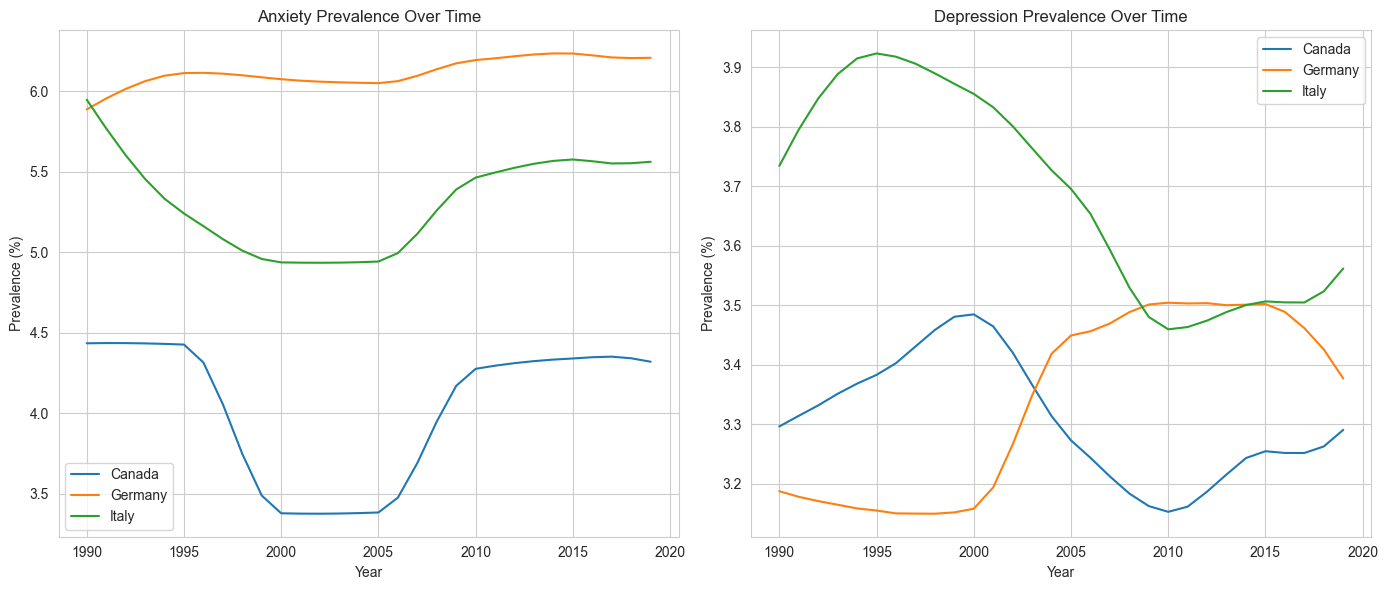

In [22]:
selected_countries = ["Canada", "Germany", "Italy"]
df_filtered = df_clean[df_clean["country"].isin(selected_countries)]

plt.figure(figsize=(14, 6))

# Anxiety
plt.subplot(1, 2, 1)
for country in selected_countries:
    plt.plot(
        df_filtered[df_filtered["country"] == country]["year"],
        df_filtered[df_filtered["country"] == country]["anxiety_prevalence"],
        label=country
    )
plt.title("Anxiety Prevalence Over Time")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")  # ✅ corrected label
plt.legend()
plt.grid(True)

# Depression
plt.subplot(1, 2, 2)
for country in selected_countries:
    plt.plot(
        df_filtered[df_filtered["country"] == country]["year"],
        df_filtered[df_filtered["country"] == country]["depression_prevalence"],
        label=country
    )
plt.title("Depression Prevalence Over Time")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")  # ✅ corrected label
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
plt.close()

## 12) Iran change calculations (1990 → 2019)

Compute absolute and percent change for:
- Anxiety prevalence
- Depression prevalence

In [23]:
iran = df_clean[df_clean["country"] == "Iran"].sort_values(by="year")

start_year = iran["year"].min()
end_year = iran["year"].max()

anxiety_start = iran[iran["year"] == start_year]["anxiety_prevalence"].values[0]
anxiety_end = iran[iran["year"] == end_year]["anxiety_prevalence"].values[0]

absolute_change = anxiety_end - anxiety_start
percent_change = (absolute_change / anxiety_start) * 100

print(f"📊 Iran - Anxiety Prevalence (from {start_year} to {end_year}):")
print(f"Start: {anxiety_start:.2f}, End: {anxiety_end:.2f}")
print(f"Absolute Change: {absolute_change:.2f}")
print(f"Percent Change: {percent_change:.2f}%")

📊 Iran - Anxiety Prevalence (from 1990 to 2019):
Start: 7.04, End: 7.27
Absolute Change: 0.23
Percent Change: 3.30%


In [25]:
iran = df_clean[df_clean["country"] == "Iran"].sort_values(by="year")

start_year = iran["year"].min()
end_year = iran["year"].max()

depression_start = iran[iran["year"] == start_year]["depression_prevalence"].values[0]
depression_end = iran[iran["year"] == end_year]["depression_prevalence"].values[0]

absolute_change = depression_end - depression_start
percent_change = (absolute_change / depression_start) * 100

print(f"📊 Iran - Depression Prevalence (from {start_year} to {end_year}):")
print(f"Start: {depression_start:.2f}, End: {depression_end:.2f}")
print(f"Absolute Change: {absolute_change:.2f}")
print(f"Percent Change: {percent_change:.2f}%")

📊 Iran - Depression Prevalence (from 1990 to 2019):
Start: 4.66, End: 4.86
Absolute Change: 0.20
Percent Change: 4.27%


## 13) IHME regions (line plots + change summary)

Plot prevalence trends for:
- Europe (IHME GBD)
- Asia (IHME GBD)
- America (IHME GBD)
- Africa (IHME GBD)

Then compute change from first to last year for each region (depression prevalence).

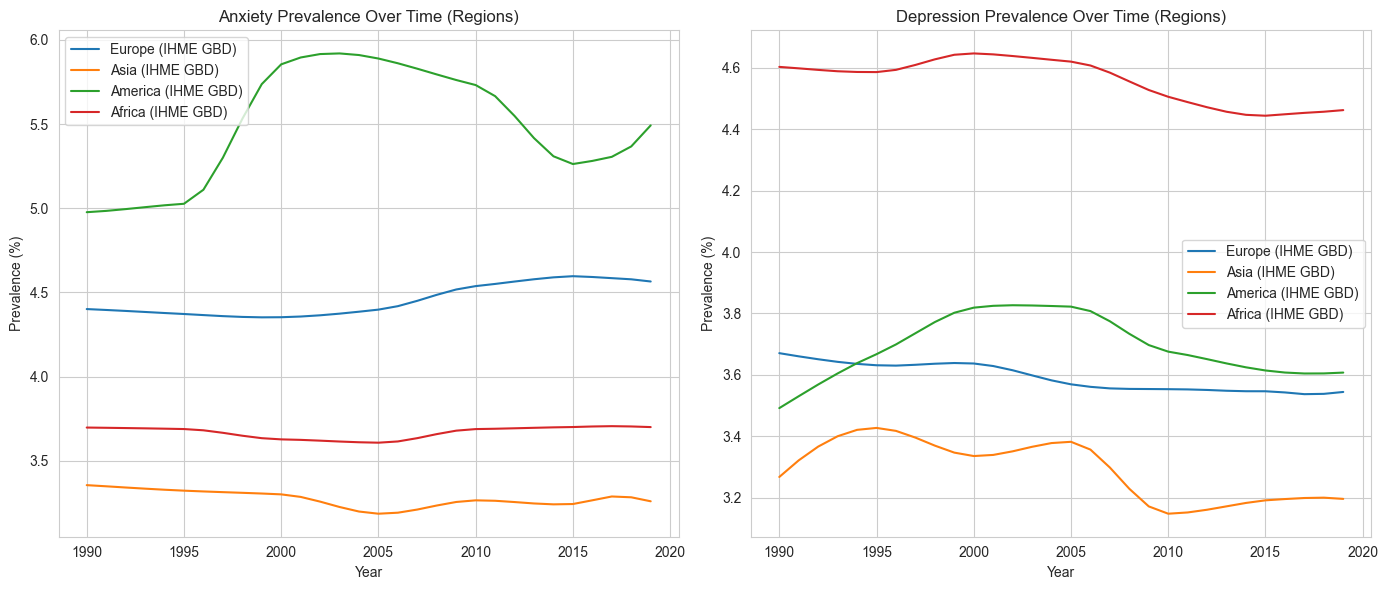

In [24]:
selected_regions = ["Europe (IHME GBD)", "Asia (IHME GBD)", "America (IHME GBD)", "Africa (IHME GBD)"]
df_filtered = df_clean[df_clean["country"].isin(selected_regions)]

plt.figure(figsize=(14, 6))

# Anxiety
plt.subplot(1, 2, 1)
for region in selected_regions:
    plt.plot(
        df_filtered[df_filtered["country"] == region]["year"],
        df_filtered[df_filtered["country"] == region]["anxiety_prevalence"],
        label=region
    )
plt.title("Anxiety Prevalence Over Time (Regions)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")  # ✅ corrected
plt.legend()
plt.grid(True)

# Depression
plt.subplot(1, 2, 2)
for region in selected_regions:
    plt.plot(
        df_filtered[df_filtered["country"] == region]["year"],
        df_filtered[df_filtered["country"] == region]["depression_prevalence"],
        label=region
    )
plt.title("Depression Prevalence Over Time (Regions)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")  # ✅ corrected
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
plt.close()

In [25]:
selected_regions = ["Europe (IHME GBD)", "Asia (IHME GBD)", "America (IHME GBD)", "Africa (IHME GBD)"]
df_filtered = df_clean[df_clean["country"].isin(selected_regions)]

for region in selected_regions:
    region_data = df_filtered[df_filtered["country"] == region].sort_values(by="year")

    start_year = region_data["year"].min()
    end_year = region_data["year"].max()

    depression_start = region_data[region_data["year"] == start_year]["depression_prevalence"].values[0]
    depression_end = region_data[region_data["year"] == end_year]["depression_prevalence"].values[0]

    absolute_change = depression_end - depression_start
    percent_change = (absolute_change / depression_start) * 100

    print(f"📊 {region} - Depression Prevalence (from {start_year} to {end_year}):")
    print(f"Start: {depression_start:.2f}, End: {depression_end:.2f}")
    print(f"Absolute Change: {absolute_change:.2f}")
    print(f"Percent Change: {percent_change:.2f}%\n")

📊 Europe (IHME GBD) - Depression Prevalence (from 1990 to 2019):
Start: 3.67, End: 3.54
Absolute Change: -0.13
Percent Change: -3.44%

📊 Asia (IHME GBD) - Depression Prevalence (from 1990 to 2019):
Start: 3.27, End: 3.20
Absolute Change: -0.07
Percent Change: -2.19%

📊 America (IHME GBD) - Depression Prevalence (from 1990 to 2019):
Start: 3.49, End: 3.61
Absolute Change: 0.12
Percent Change: 3.31%

📊 Africa (IHME GBD) - Depression Prevalence (from 1990 to 2019):
Start: 4.60, End: 4.46
Absolute Change: -0.14
Percent Change: -3.06%



## 14) Export cleaned prevalence dataset (Tableau input)
This produces: `cleaned_mental-illnesses.csv`

In [26]:
df_clean.to_csv("/Users/zohrehsamieekadkani/Desktop/Dashboard image/archive/cleaned_mental-illnesses.csv", index=False)

# Part B — DALYs dataset (Tableau input)

We now clean the DALYs dataset and export:
`cleaned_burden-disease.csv`

Note: Column names are kept exactly in your style (e.g., `DALYs (rate)_...`)
because Tableau already uses them.

In [38]:
df = pd.read_csv("/Users/zohrehsamieekadkani/Desktop/Dashboard image/archive/2- burden-disease-from-each-mental-illness(1).csv")

df.info()
display(df.head())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Entity                                                                          6840 non-null   object 
 1   Code                                                                            6150 non-null   object 
 2   Year                                                                            6840 non-null   int64  
 3   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders  6840 non-null   float64
 4   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia         6840 non-null   float64
 5   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder      6840 non-null   float64
 6   DALYs (rate) - Se

,Entity,Code,Year,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders
0,Afghanistan,AFG,1990,895.22565,138.24825,147.64412,26.471115,440.33000
1,Afghanistan,AFG,1991,893.88434,137.76122,147.56696,25.548681,439.47202
2,Afghanistan,AFG,1992,892.34973,137.08030,147.13086,24.637949,437.60718
3,Afghanistan,AFG,1993,891.51587,136.48602,146.78812,23.863169,436.69104
4,Afghanistan,AFG,1994,891.39160,136.18323,146.58481,23.189074,436.76800


Entity                                                                              0
Code                                                                              690
Year                                                                                0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders      0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia             0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder          0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders          0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders         0
dtype: int64

In [39]:
# Drop Code column only if it exists
if "Code" in df.columns:
    df1 = df.drop(columns=["Code"])
else:
    df1 = df.copy()

# Rename Entity -> country (only if needed)
if "Entity" in df1.columns:
    df2 = df1.rename(columns={"Entity": "country"})
else:
    df2 = df1.copy()

# Standardize column names
df2.columns = (
    df2.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace(r"[()]+", "", regex=True)
)

# Final rename (DALYs columns)
df_clean2 = df2.rename(columns={
    "dalys_rate___sex:_both___age:_age_standardized___cause:_depressive_disorders": "DALYs (rate)_depressive_disorders",
    "dalys_rate___sex:_both___age:_age_standardized___cause:_schizophrenia": "DALYs (rate)_schizophrenia",
    "dalys_rate___sex:_both___age:_age_standardized___cause:_bipolar_disorder": "DALYs (rate)_bipolar_disorder",
    "dalys_rate___sex:_both___age:_age_standardized___cause:_eating_disorders": "DALYs (rate)_eating_disorders",
    "dalys_rate___sex:_both___age:_age_standardized___cause:_anxiety_disorders": "DALYs (rate)_anxiety_disorders"
})

df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            6840 non-null   object 
 1   year                               6840 non-null   int64  
 2   DALYs (rate)_depressive_disorders  6840 non-null   float64
 3   DALYs (rate)_schizophrenia         6840 non-null   float64
 4   DALYs (rate)_bipolar_disorder      6840 non-null   float64
 5   DALYs (rate)_eating_disorders      6840 non-null   float64
 6   DALYs (rate)_anxiety_disorders     6840 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 374.2+ KB


## 16) Export cleaned DALYs dataset (Tableau input)
This produces: `cleaned_burden-disease.csv`

In [37]:
df_clean2.to_csv("/Users/zohrehsamieekadkani/Desktop/Dashboard image/archive/cleaned_burden-disease.csv", index=False)


# Part C — Primary data coverage (Tableau input)

We clean and export:
`cleaned_burden-number-of-countries.csv`

In [41]:
df = pd.read_csv("/Users/zohrehsamieekadkani/Desktop/Dashboard image/archive/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

df.info()
display(df.head())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Entity                                                                   15 non-null     object 
 1   Code                                                                     0 non-null      float64
 2   Year                                                                     15 non-null     int64  
 3   Number of countries with primary data on prevalence of mental disorders  15 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 612.0+ bytes


,Entity,Code,Year,Number of countries with primary data on prevalence of mental disorders
0,Alcohol use disorders,NaN,2019,58
1,Amphetamine use disorders,NaN,2019,58
2,Anorexia nervosa,NaN,2019,27
3,Anxiety disorders,NaN,2019,58
4,Attention-deficit hyperactivity disorder,NaN,2019,172


Entity                                                                      0
Code                                                                       15
Year                                                                        0
Number of countries with primary data on prevalence of mental disorders     0
dtype: int64

In [42]:
df1 = df.drop(columns=["Code"])
df2 = df1.rename(columns={"Entity": "country"})


In [43]:
df_clean2.to_csv("/Users/zohrehsamieekadkani/Desktop/Dashboard image/archive/cleaned_burden-number-of-countries.csv", index=False)


# ✅ Conclusion

In this notebook I:
- Cleaned and standardized three GBD mental health datasets in Python
- Ran a small set of exploratory analyses (trend, top countries, correlation, clustering) to understand the data
- Exported cleaned CSV files that were then used as inputs for a Tableau dashboard

**Note:** All final dashboard visuals and storytelling were created directly in Tableau.  
This notebook is focused on data preparation and exploratory validation.